In [54]:
%load_ext autoreload
%autoreload 2

import deltas
from deltas.pipeline import data, classifier, evaluation
from deltas.model import downsample
import deltas.classifiers.models as models
from deltas.classifiers.mimic_train import LargeMarginClassifierMIMIC, MIMIC_torch
from sklearn.model_selection import GridSearchCV

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [55]:
dataset = 'MIMIC-III-sepsis'  # change ind to select dataset to use
data_clf = data.get_real_dataset(dataset, scale=True)

MIMIC-III-sepsis: 4165
Number of attribues: 26
Classes total: 3301 - 864

Classes train: 165 - 43
Classes test:  3136 - 821


In [56]:
data = data_clf['data']
# clf = MIMIC_torch(lr=0.001, cuda=False).fit(
#     data['X'], data['y'], epochs=50)
clf = models.NN(hidden_layer_sizes=(
    100, 500, 1000, 500, 100), max_iter=100).fit(data['X'], data['y'])

# clf = models.NN(hidden_layer_sizes=(
#     100, 1000, 100), max_iter=100).fit(data['X'], data['y'])


# param_grid = {'solver': ['lbfgs', 'sgd', 'adam'],
#               'hidden_layer_sizes': [(100,), (100, 500, 100), (100, 200, 200, 100), (100, 200, 500, 200, 100)],
#             'activation': ['relu', 'tanh', 'logistic'],
#             'learning_rate_init': [0.0001, 0.001, 0.01]}
# print('Tuning params with 5 fold CV')
#         # original
# grid_original = GridSearchCV(models.NN(), param_grid, refit=True, n_jobs=-1)
# grid_original.fit(data['X'], data['y'])
# clf = grid_original.best_estimator_
# print(f'Best params: {grid_original.best_params_}')


/home/matt/anaconda3/envs/deltas/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Original Data
plotting training data as data input


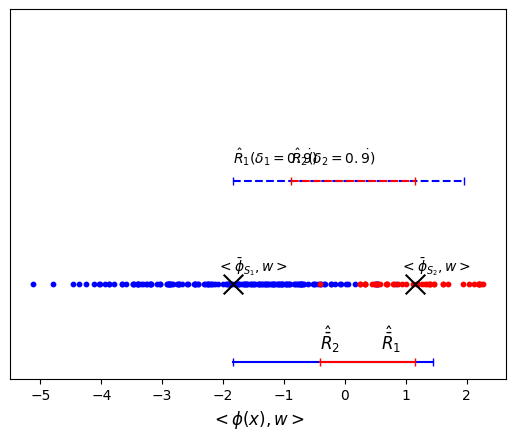

Budget 104 found 34 viable downsampled solutions
Best solution found by removing 73 data points
Downsampled Data:


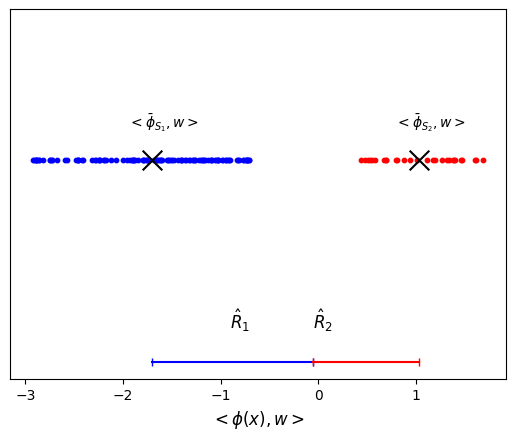

In [57]:
X = data_clf['data']['X']
y = data_clf['data']['y']
# deltas_model = model_deltas.reprojection_deltas(
deltas_model = downsample.downsample_deltas(clf).fit(X, y,
                                                     alpha=10,
                                                     _print=True,
                                                     _plot=True,
                                                     method='supports-prop-update_mean',
                                                     max_trials=1000,
                                                     parallel=True)

          Accuracy    G-Mean  ROC-AUC        F1
Method                                         
Original  0.849634  0.744906  0.86736  0.626491
Deltas    0.846854  0.744087  0.86736  0.622665 


Original


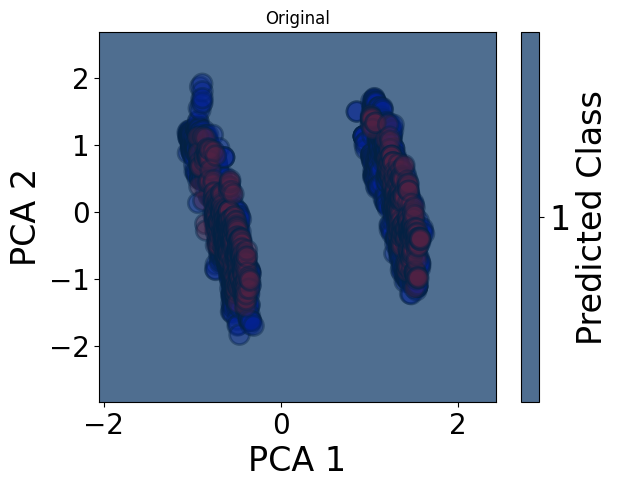

Deltas


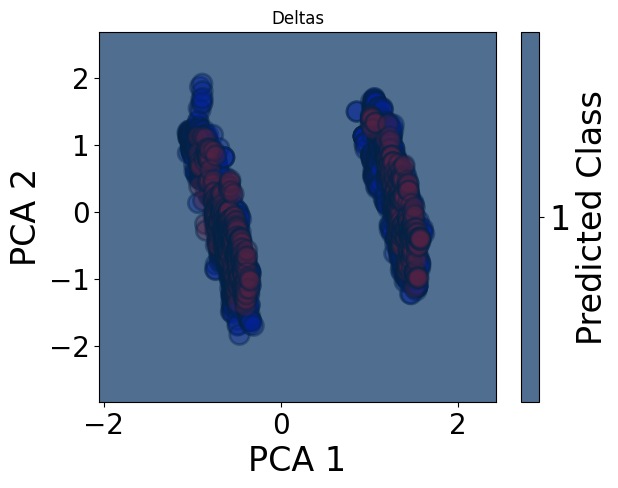

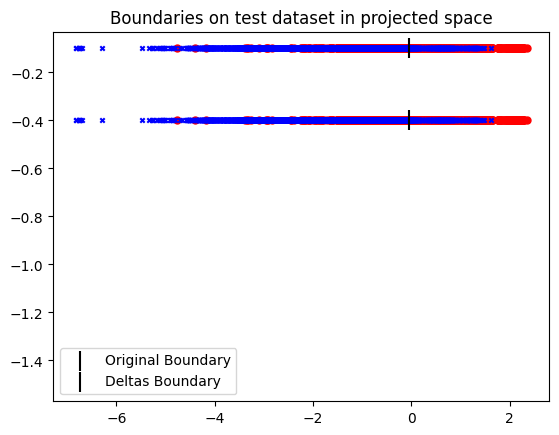

LATEX table format


\begin{tabular}{lrrrr}
 & Accuracy & G-Mean & ROC-AUC & F1 \\
Method &  &  &  &  \\
Original & 0.8496 & 0.7449 & 0.8674 & 0.6265 \\
Deltas & 0.8469 & 0.7441 & 0.8674 & 0.6227 \\
\end{tabular}



,Accuracy,G-Mean,ROC-AUC,F1
Method,,,,
Original,0.849634,0.744906,0.86736,0.626491
Deltas,0.846854,0.744087,0.86736,0.622665


In [58]:
classifiers_dict = {'Original': clf, 'Deltas': deltas_model}
classifiers_dict = {'Original': clf, 'Deltas': deltas_model}
evaluation.eval_test(classifiers_dict, data_clf['data_test'], _print=True,
                     _plot=True, dim_reducer=data_clf['dim_reducer'])